In [57]:
# Import libraries and dependencies
import os
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
import datetime as dt
from pathlib import Path
import seaborn as sns
import plotly.express as px
import hvplot.pandas
import hvplot.dask
import panel as pn

In [2]:
cpi_path = Path("CPI_data.csv")
cpi_df = pd.read_csv(cpi_path, index_col = 'DATE', parse_dates=True, infer_datetime_format=True)
cpi_df.index = pd.to_datetime(cpi_df.index, format = '%Y/%m').strftime('%Y-%m')
cpi_df = cpi_df.sort_index()
cpi_df.head()

,CPI
1960-01,-0.340136
1960-02,0.341297
1960-03,0.000000
1960-04,0.340136
1960-05,0.000000


In [3]:
housing_path = Path("Housing_data.csv")
housing_df = pd.read_csv(housing_path, index_col = 'DATE', parse_dates=True, infer_datetime_format=True)
housing_df.index = pd.to_datetime(housing_df.index, format = '%Y/%m').strftime('%Y-%m')
housing_df = housing_df.sort_index()
housing_df.head()

,MSPUS
1963-01,17800.0
1963-04,18000.0
1963-07,17900.0
1963-10,18500.0
1964-01,18500.0


In [4]:
housing_df = housing_df.rename(columns={"MSPUS": "Median_Housing_Prices"})
housing_df.head()

,Median_Housing_Prices
1963-01,17800.0
1963-04,18000.0
1963-07,17900.0
1963-10,18500.0
1964-01,18500.0


In [5]:
combined_df = pd.concat([cpi_df,housing_df], axis='columns', join='inner')

combined_df.head()

,CPI,Median_Housing_Prices
1963-01,0.000000,17800.0
1963-04,0.000000,18000.0
1963-07,0.326797,17900.0
1963-10,0.325733,18500.0
1964-01,0.000000,18500.0


In [6]:
csv_path = Path('../Project_1/FedBalanceSheet.csv')
fed_df = pd.read_csv(csv_path, index_col="DATE", parse_dates=True)
columns = ['FED BS']
fed_df.columns = columns
fed_df.index = pd.to_datetime(fed_df.index, format = '%Y/%m').strftime('%Y-%m')
fed_df = fed_df.reset_index().drop_duplicates(subset='index', keep='first').set_index('index')
fed_df.sort_index(inplace=True)
fed_df.tail()

,FED BS
index,
2021-01,7334809.0
2021-02,7410598.0
2021-03,7557524.0
2021-04,7708882.0
2021-05,7810486.0


In [7]:
combo_df = pd.merge(fed_df, combined_df, how='inner', left_index=True, right_index=True)
combo_df.index = pd.to_datetime(combo_df.index)
combo_df.head(20)

,FED BS,CPI,Median_Housing_Prices
2003-01-01,730994.0,0.442233,186000.0
2003-04-01,732452.0,-0.217155,191800.0
2003-07-01,740126.0,0.108873,191900.0
2003-10-01,753155.0,-0.107991,198800.0
2004-01-01,755829.0,0.488334,212700.0
2004-04-01,754083.0,0.320171,217600.0
2004-07-01,778163.0,-0.158144,213500.0
2004-10-01,781777.0,0.526593,228800.0
2005-01-01,815702.0,0.210194,232500.0
2005-04-01,797327.0,0.672530,233700.0


In [8]:
combo_df['CPI / FED BS'] = combo_df['CPI']/combo_df['FED BS']
combo_df['Median_Housing_Prices / FED BS'] = combo_df['Median_Housing_Prices']/combo_df['FED BS']

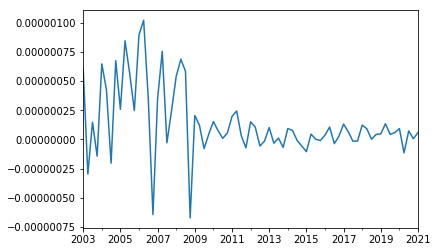

In [9]:
combo_df['CPI / FED BS'].plot.line()

In [10]:

#combo_df['CPI / FED BS'].hvplot.line(rot=90, Title='CPI / FED Balance Sheet')
from bokeh.models.formatters import DatetimeTickFormatter

formatter = DatetimeTickFormatter(months='%b %Y')
combo_df.hvplot(x='index', y="CPI / FED BS")


:Curve   [index]   (CPI / FED BS)

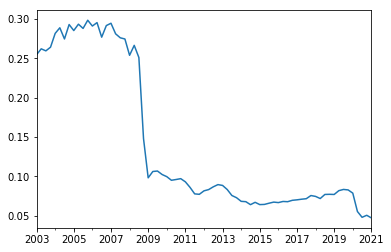

In [11]:
combo_df['Median_Housing_Prices / FED BS'].plot.line()

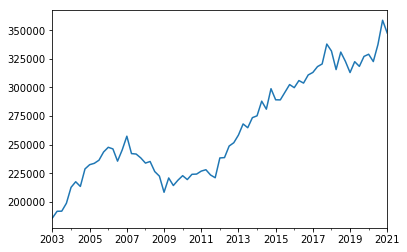

In [12]:
combo_df['Median_Housing_Prices'].plot.line()

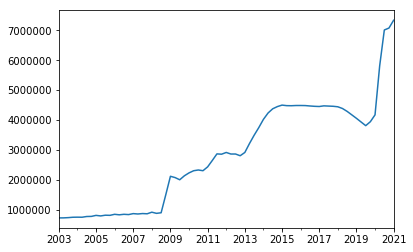

In [13]:
combo_df['FED BS'].plot.line()

In [14]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [15]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [16]:
# Set timeframe to '1D'
timeframe1 = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date1 = pd.Timestamp("2007-01-01", tz="America/New_York").isoformat()
end_date1 = pd.Timestamp("2008-05-31", tz="America/New_York").isoformat()

# Set the ticker information
tickers1 = ["SPY","GOOG","GDX", "AMZN", "MSFT"]

# Get 3 year's worth of historical price data for SPY
df_ticker1 = api.get_barset(
    tickers1,
    timeframe1,
    start=start_date1,
    end=end_date1,
    limit=1000,
).df

# Display sample data
df_ticker1.head()

AMZN                                   GDX         \
                            open   high    low  close    volume   open   high   
time                                                                            
2008-01-02 00:00:00-05:00  95.37  97.43  94.70  96.21  13481385  46.69  49.24   
2008-01-03 00:00:00-05:00  96.20  97.25  94.52  95.18   8638898  49.35  51.18   
2008-01-04 00:00:00-05:00  93.38  93.40  88.44  88.74  10015762  50.28  50.35   
2008-01-07 00:00:00-05:00  88.60  90.57  85.47  88.84   9584246  49.92  50.28   
2008-01-08 00:00:00-05:00  87.64  91.83  86.93  87.92  12053422  50.74  51.98   

                                                  ...   MSFT                \
                             low  close   volume  ...   open   high    low   
time                                              ...                        
2008-01-02 00:00:00-05:00  46.69  49.15  3418996  ...  35.79  35.96  35.00   
2008-01-03 00:00:00-05:00  49.10  50.58  3850762  ...  35.24  35.65  34.86   
2008-01-04 00:00:00-05:00  49.28  49.75  2351429  ...  35.22  35.22  34.09   
2008-01-07 00:00:00-05:00  48.52  49.06  2857714  ...  34.51  34.80  34.25   
2008-01-08 00:00:00-05:00  50.60  50.62  4560326  ...  34.69  34.71  33.40   

                                               SPY                          \
                           close    volume    open    high     low   close   
time                                                                         
2008-01-02 00:00:00-05:00  35.23  59132565  146.53  146.99  143.88  144.55   
2008-01-03 00:00:00-05:00  35.37  47191633  144.92  145.49  144.12  144.46   
2008-01-04 00:00:00-05:00  34.36  67779211  143.34  143.44  140.92  140.93   
2008-01-07 00:00:00-05:00  34.65  78172999  141.81  142.23  140.10  141.46   
2008-01-08 00:00:00-05:00  33.46  83932977  142.10  142.90  138.63  138.81   

                                      
                              volume  
time                                  
2008-01-02 00:00:00-05:00  175801806  
2008-01-03 00:00:00-05:00  111357758  
2008-01-04 00:00:00-05:00  195945264  
2008-01-07 00:00:00-05:00  220398905  
2008-01-08 00:00:00-05:00  303249870  

[5 rows x 25 columns]

In [17]:
# Set timeframe to '1D'
timeframe2 = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date2 = pd.Timestamp("2008-06-01", tz="America/New_York").isoformat()
end_date2 = pd.Timestamp("2011-05-31", tz="America/New_York").isoformat()

# Set the ticker information
tickers2 = ["SPY","GOOG","GDX", "AMZN", "MSFT"]

# Get 3 year's worth of historical price data for SPY
df_ticker2 = api.get_barset(
    tickers2,
    timeframe2,
    start=start_date2,
    end=end_date2,
    limit=1000,
).df

# Display sample data
df_ticker2.head()

AMZN                                  GDX         \
                            open   high    low  close   volume   open   high   
time                                                                           
2008-06-02 00:00:00-04:00  81.21  81.57  80.05  80.31  5892868  46.00  46.75   
2008-06-03 00:00:00-04:00  80.67  81.89  79.26  80.09  5527198  45.69  46.61   
2008-06-04 00:00:00-04:00  80.11  81.82  79.72  81.50  6172427  45.56  45.59   
2008-06-05 00:00:00-04:00  82.11  84.88  81.80  84.51  8672171  44.41  45.83   
2008-06-06 00:00:00-04:00  83.21  83.64  80.56  80.62  7615909  46.19  47.25   

                                                  ...   MSFT                \
                             low  close   volume  ...   open   high    low   
time                                              ...                        
2008-06-02 00:00:00-04:00  45.95  46.35   903592  ...  28.26  28.36  27.55   
2008-06-03 00:00:00-04:00  45.43  45.45  1318342  ...  27.94  28.31  27.27   
2008-06-04 00:00:00-04:00  44.60  44.67  1525740  ...  27.27  27.64  27.20   
2008-06-05 00:00:00-04:00  44.30  45.78  1557682  ...  27.73  28.30  27.60   
2008-06-06 00:00:00-04:00  46.19  46.75  1878783  ...  27.97  28.17  27.50   

                                                 SPY                          \
                             close    volume    open    high     low   close   
time                                                                           
2008-06-02 00:00:00-04:00  27.8017  73108946  139.82  139.86  138.00  138.83   
2008-06-03 00:00:00-04:00  27.3100  75727063  139.33  139.62  137.23  138.05   
2008-06-04 00:00:00-04:00  27.5400  76492009  137.77  139.16  137.46  138.04   
2008-06-05 00:00:00-04:00  28.2100  68933267  138.58  140.83  138.32  140.64   
2008-06-06 00:00:00-04:00  27.5000  73661823  139.56  139.80  136.34  136.38   

                                      
                              volume  
time                                  
2008-06-02 00:00:00-04:00  156367854  
2008-06-03 00:00:00-04:00  242455372  
2008-06-04 00:00:00-04:00  222845642  
2008-06-05 00:00:00-04:00  199365016  
2008-06-06 00:00:00-04:00  308266018  

[5 rows x 25 columns]

In [18]:
# Set timeframe to '1D'
timeframe3 = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date3 = pd.Timestamp("2011-06-01", tz="America/New_York").isoformat()
end_date3 = pd.Timestamp("2014-05-31", tz="America/New_York").isoformat()

# Set the ticker information
tickers3 = ["SPY","GOOG","GDX", "AMZN", "MSFT"]

# Get 3 year's worth of historical price data for SPY
df_ticker3 = api.get_barset(
    tickers3,
    timeframe3,
    start=start_date3,
    end=end_date3,
    limit=1000,
).df

# Display sample data
df_ticker3.tail()

AMZN                                         GDX  \
                             open      high       low   close   volume   open   
time                                                                            
2014-05-23 00:00:00-04:00  305.46  312.3500  304.9000  312.25  2399925  23.42   
2014-05-27 00:00:00-04:00  314.41  314.6300  307.3800  310.83  4039105  23.00   
2014-05-28 00:00:00-04:00  309.50  313.8200  307.4200  310.16  1936535  22.33   
2014-05-29 00:00:00-04:00  310.11  314.8700  310.1100  313.94  1842634  21.96   
2014-05-30 00:00:00-04:00  314.08  315.1275  308.0367  312.90  2678353  22.14   

                                                          ...   MSFT         \
                            high    low  close    volume  ...   open   high   
time                                                      ...                 
2014-05-23 00:00:00-04:00  23.50  23.30  23.31   6511240  ...  40.30  40.37   
2014-05-27 00:00:00-04:00  23.02  22.41  22.43  27866589  ...  40.26  40.26   
2014-05-28 00:00:00-04:00  22.42  21.93  22.05  21690424  ...  40.14  40.19   
2014-05-29 00:00:00-04:00  22.46  21.93  22.23  15499952  ...  40.15  40.35   
2014-05-30 00:00:00-04:00  22.50  21.94  22.49  19682815  ...  40.45  40.97   

                                                      SPY                  \
                             low  close    volume    open    high     low   
time                                                                        
2014-05-23 00:00:00-04:00  40.00  40.12  15035592  189.75  190.48  189.68   
2014-05-27 00:00:00-04:00  39.81  40.18  20001096  191.05  191.58  190.95   
2014-05-28 00:00:00-04:00  39.82  40.00  20631963  191.52  191.82  191.06   
2014-05-29 00:00:00-04:00  39.91  40.34  17798510  191.82  192.38  191.33   
2014-05-30 00:00:00-04:00  40.25  40.93  27215584  192.18  192.80  192.03   

                                             
                            close    volume  
time                                         
2014-05-23 00:00:00-04:00  190.37  47447733  
2014-05-27 00:00:00-04:00  191.54  50055074  
2014-05-28 00:00:00-04:00  191.35  51481827  
2014-05-29 00:00:00-04:00  192.38  51129312  
2014-05-30 00:00:00-04:00  192.65  59298109  

[5 rows x 25 columns]

In [19]:
# Set timeframe to '1D'
timeframe4 = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date4 = pd.Timestamp("2014-06-01", tz="America/New_York").isoformat()
end_date4 = pd.Timestamp("2017-05-31", tz="America/New_York").isoformat()

# Set the ticker information
tickers4 = ["SPY","GOOG","GDX", "AMZN", "MSFT"]

# Get 3 year's worth of historical price data for SPY
df_ticker4 = api.get_barset(
    tickers4,
    timeframe4,
    start=start_date4,
    end=end_date4,
    limit=1000,
).df

# Display sample data
df_ticker4.tail()

AMZN                                        GDX  \
                              open     high       low   close   volume   open   
time                                                                            
2017-05-24 00:00:00-04:00   976.00   981.00  970.2300  980.35  1580606  22.57   
2017-05-25 00:00:00-04:00   984.85   999.00  982.1100  993.39  3354037  22.72   
2017-05-26 00:00:00-04:00   995.00   998.65  989.2491  995.76  2507406  23.01   
2017-05-30 00:00:00-04:00   996.63  1001.20  995.5200  996.76  2155705  22.65   
2017-05-31 00:00:00-04:00  1000.00  1000.12  982.1600  994.63  2527426  22.67   

                                                          ...   MSFT         \
                            high    low  close    volume  ...   open   high   
time                                                      ...                 
2017-05-24 00:00:00-04:00  22.98  22.20  22.96  46490322  ...  68.87  68.88   
2017-05-25 00:00:00-04:00  22.83  22.49  22.72  29532844  ...  68.97  69.88   
2017-05-26 00:00:00-04:00  23.05  22.83  22.92  21762707  ...  69.80  70.22   
2017-05-30 00:00:00-04:00  22.84  22.59  22.61  24277393  ...  69.79  70.41   
2017-05-31 00:00:00-04:00  22.91  22.45  22.71  36543578  ...  70.52  70.74   

                                                      SPY                  \
                             low  close    volume    open    high     low   
time                                                                        
2017-05-24 00:00:00-04:00  68.45  68.77  11426105  240.32  240.73  239.93   
2017-05-25 00:00:00-04:00  68.91  69.62  17091239  241.20  242.08  240.96   
2017-05-26 00:00:00-04:00  69.52  69.96  16791297  241.55  241.90  241.45   
2017-05-30 00:00:00-04:00  69.77  70.41  13709243  241.33  241.79  241.16   
2017-05-31 00:00:00-04:00  69.81  69.87  20186658  241.84  241.88  240.64   

                                             
                            close    volume  
time                                         
2017-05-24 00:00:00-04:00  240.59  37423590  
2017-05-25 00:00:00-04:00  241.71  45278321  
2017-05-26 00:00:00-04:00  241.74  30002081  
2017-05-30 00:00:00-04:00  241.52  28437351  
2017-05-31 00:00:00-04:00  241.42  59140588  

[5 rows x 25 columns]

In [20]:
# Set timeframe to '1D'
timeframe5 = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date5 = pd.Timestamp("2017-06-01", tz="America/New_York").isoformat()
end_date5 = pd.Timestamp("2021-05-25", tz="America/New_York").isoformat()

# Set the ticker information
tickers5 = ["SPY","GOOG","GDX", "AMZN", "MSFT"]

# Get 3 year's worth of historical price data for SPY
df_ticker5 = api.get_barset(
    tickers5,
    timeframe5,
    start=start_date5,
    end=end_date5,
    limit=1000,
).df

# Display sample data
df_ticker5.tail()


AMZN                                          \
                              open       high        low    close   volume   
time                                                                         
2021-05-19 00:00:00-04:00  3196.80  3234.7500  3184.0000  3232.55  2293730   
2021-05-20 00:00:00-04:00  3247.59  3259.6800  3236.1800  3248.54  2183695   
2021-05-21 00:00:00-04:00  3248.93  3256.6946  3197.0100  3202.00  3554260   
2021-05-24 00:00:00-04:00  3215.50  3257.9500  3210.4993  3244.68  2070646   
2021-05-25 00:00:00-04:00  3266.97  3279.8200  3213.7600  3259.05  2899982   

                               GDX                                    ...  \
                              open     high     low  close    volume  ...   
time                                                                  ...   
2021-05-19 00:00:00-04:00  39.2900  40.1300  38.595  39.03  31018489  ...   
2021-05-20 00:00:00-04:00  39.0889  39.7975  38.920  39.51  15730920  ...   
2021-05-21 00:00:00-04:00  39.7400  39.7600  38.910  39.25  14332891  ...   
2021-05-24 00:00:00-04:00  39.3800  39.6550  39.170  39.43  10994324  ...   
2021-05-25 00:00:00-04:00  39.3620  39.6899  38.870  39.48  17690784  ...   

                             MSFT                                       SPY  \
                             open    high     low   close    volume    open   
time                                                                          
2021-05-19 00:00:00-04:00  239.30  243.23  238.60  243.14  20375646  406.92   
2021-05-20 00:00:00-04:00  243.85  247.95  243.85  246.48  16244463  411.80   
2021-05-21 00:00:00-04:00  247.56  248.33  244.74  245.19  17576230  416.87   
2021-05-24 00:00:00-04:00  247.77  251.16  247.51  250.85  16444165  417.34   
2021-05-25 00:00:00-04:00  251.65  252.75  250.82  251.85  14091454  420.33   

                                                               
                              high      low   close    volume  
time                                                           
2021-05-19 00:00:00-04:00  411.050  405.335  410.90  94165741  
2021-05-20 00:00:00-04:00  416.625  411.670  415.24  69426295  
2021-05-21 00:00:00-04:00  418.200  414.450  414.95  66392970  
2021-05-24 00:00:00-04:00  420.320  417.080  419.12  45514589  
2021-05-25 00:00:00-04:00  420.710  417.620  418.25  50976654  

[5 rows x 25 columns]

In [21]:
# Concatenate the two DataFrames by rows and perform an inner join
df_ticker_total = pd.concat([df_ticker1, df_ticker2, df_ticker3, df_ticker4, df_ticker5], axis="rows", join="inner")
df_ticker_total.head()

AMZN                                   GDX         \
                            open   high    low  close    volume   open   high   
time                                                                            
2008-01-02 00:00:00-05:00  95.37  97.43  94.70  96.21  13481385  46.69  49.24   
2008-01-03 00:00:00-05:00  96.20  97.25  94.52  95.18   8638898  49.35  51.18   
2008-01-04 00:00:00-05:00  93.38  93.40  88.44  88.74  10015762  50.28  50.35   
2008-01-07 00:00:00-05:00  88.60  90.57  85.47  88.84   9584246  49.92  50.28   
2008-01-08 00:00:00-05:00  87.64  91.83  86.93  87.92  12053422  50.74  51.98   

                                                  ...   MSFT                \
                             low  close   volume  ...   open   high    low   
time                                              ...                        
2008-01-02 00:00:00-05:00  46.69  49.15  3418996  ...  35.79  35.96  35.00   
2008-01-03 00:00:00-05:00  49.10  50.58  3850762  ...  35.24  35.65  34.86   
2008-01-04 00:00:00-05:00  49.28  49.75  2351429  ...  35.22  35.22  34.09   
2008-01-07 00:00:00-05:00  48.52  49.06  2857714  ...  34.51  34.80  34.25   
2008-01-08 00:00:00-05:00  50.60  50.62  4560326  ...  34.69  34.71  33.40   

                                               SPY                          \
                           close    volume    open    high     low   close   
time                                                                         
2008-01-02 00:00:00-05:00  35.23  59132565  146.53  146.99  143.88  144.55   
2008-01-03 00:00:00-05:00  35.37  47191633  144.92  145.49  144.12  144.46   
2008-01-04 00:00:00-05:00  34.36  67779211  143.34  143.44  140.92  140.93   
2008-01-07 00:00:00-05:00  34.65  78172999  141.81  142.23  140.10  141.46   
2008-01-08 00:00:00-05:00  33.46  83932977  142.10  142.90  138.63  138.81   

                                      
                              volume  
time                                  
2008-01-02 00:00:00-05:00  175801806  
2008-01-03 00:00:00-05:00  111357758  
2008-01-04 00:00:00-05:00  195945264  
2008-01-07 00:00:00-05:00  220398905  
2008-01-08 00:00:00-05:00  303249870  

[5 rows x 25 columns]

In [22]:
#Fetch the closing prices of SPY and GOOG
#df_closing_prices = pd.concat(df_ticker_total["SPY"]["close"], df_ticker_total["GOOG"]["close"])

dict_data = {'SPY':df_ticker_total["SPY"]["close"],'GOOG':df_ticker_total["GOOG"]["close"],
             'GDX':df_ticker_total["GDX"]["close"],'AMZN':df_ticker_total["AMZN"]["close"]
            ,'MSFT':df_ticker_total["MSFT"]["close"]
            }
df_closing_prices = pd.concat(dict_data, axis = 1)

#Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date
#df_closing_prices.index.names = ['DATE']

#Display sample data
df_closing_prices.head(10)


,AMZN,GDX,GOOG,MSFT,SPY
2008-01-02,96.21,49.15,342.590,35.23,144.55
2008-01-03,95.18,50.58,342.490,35.37,144.46
2008-01-04,88.74,49.75,328.480,34.36,140.93
2008-01-07,88.84,49.06,324.340,34.65,141.46
2008-01-08,87.92,50.62,315.660,33.46,138.81
2008-01-09,85.09,51.10,326.350,34.44,140.78
2008-01-10,84.28,52.06,323.282,34.32,141.80
2008-01-11,81.14,52.54,319.440,33.92,140.01
2008-01-14,82.87,53.28,326.876,34.39,141.46
2008-01-15,80.25,51.29,318.750,34.00,137.95


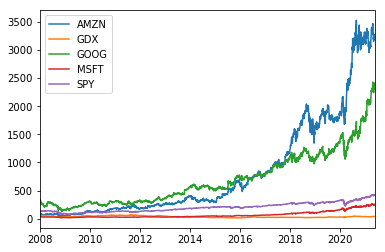

In [23]:
# Visualize distribution of closing price using a  plot
df_closing_prices.plot.line()

In [24]:
# Use the Pathlib libary to set the path to the CSV
csv_path = Path('../Project_1/FedBalanceSheet.csv')

In [25]:
# Use the file path to read the CSV into a DataFrame and display a few rows
fed_df = pd.read_csv(csv_path, index_col="DATE", parse_dates=True)
columns = ['FED BS']
fed_df.columns = columns
fed_df.tail()

,FED BS
DATE,
2021-04-21,7820948.0
2021-04-28,7780962.0
2021-05-05,7810486.0
2021-05-12,7830663.0
2021-05-19,7922883.0


In [26]:
# Sort datetime index in ascending order (past to present)
fed_df.sort_index(inplace=True)
df_closing_prices.sort_index(inplace=True)


In [27]:
df2 = pd.merge(df_closing_prices, fed_df, left_index=True, right_index=True)
df2.head(20)

,AMZN,GDX,GOOG,MSFT,SPY,FED BS
2008-01-02,96.2100,49.15,342.59,35.23,144.55,922187.0
2008-01-09,85.0900,51.10,326.35,34.44,140.78,880754.0
2008-01-16,80.2500,49.03,307.71,33.21,137.15,893581.0
2008-01-23,74.0000,48.35,274.50,32.00,133.81,877253.0
2008-01-30,74.2100,51.17,274.16,32.20,135.36,900264.0
2008-02-06,68.3300,46.86,250.86,28.52,132.72,871022.0
2008-02-13,77.7300,47.76,267.00,28.97,136.71,883005.0
2008-02-20,73.6300,50.71,254.50,28.23,136.11,878949.0
2008-02-27,70.8700,53.16,236.47,28.30,138.12,893825.0
2008-03-05,65.0100,54.64,223.87,28.13,133.70,881208.0


In [28]:
df2['SPY / FED BS'] = df2['SPY']/df2['FED BS']
df2['GOOG / FED BS'] = df2['GOOG']/df2['FED BS']
df2['GDX / FED BS'] = df2['GDX']/df2['FED BS']
df2['AMZN / FED BS'] = df2['AMZN']/df2['FED BS']
df2['MSFT / FED BS'] = df2['MSFT']/df2['FED BS']

df2.head()

,AMZN,GDX,GOOG,MSFT,SPY,FED BS,SPY / FED BS,GOOG / FED BS,GDX / FED BS,AMZN / FED BS,MSFT / FED BS
2008-01-02,96.21,49.15,342.59,35.23,144.55,922187.0,0.000157,0.000371,0.000053,0.000104,0.000038
2008-01-09,85.09,51.10,326.35,34.44,140.78,880754.0,0.000160,0.000371,0.000058,0.000097,0.000039
2008-01-16,80.25,49.03,307.71,33.21,137.15,893581.0,0.000153,0.000344,0.000055,0.000090,0.000037
2008-01-23,74.00,48.35,274.50,32.00,133.81,877253.0,0.000153,0.000313,0.000055,0.000084,0.000036
2008-01-30,74.21,51.17,274.16,32.20,135.36,900264.0,0.000150,0.000305,0.000057,0.000082,0.000036


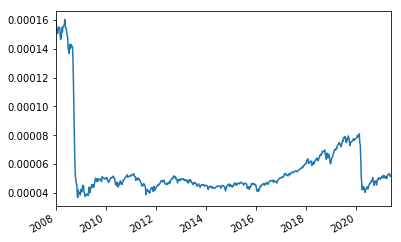

In [29]:
df2['SPY / FED BS'].plot.line()

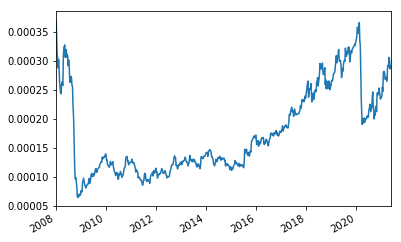

In [30]:
df2['GOOG / FED BS'].plot.line()

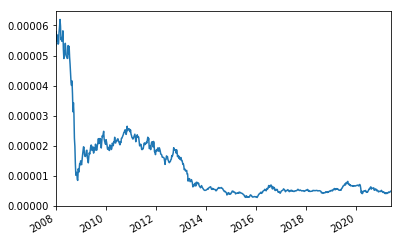

In [31]:
df2['GDX / FED BS'].plot.line()

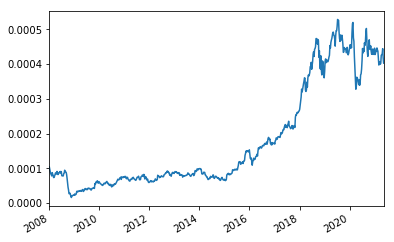

In [32]:
df2['AMZN / FED BS'].plot.line()

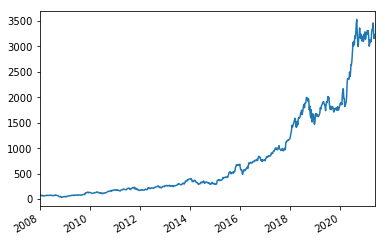

In [33]:
df2['AMZN'].plot.line()

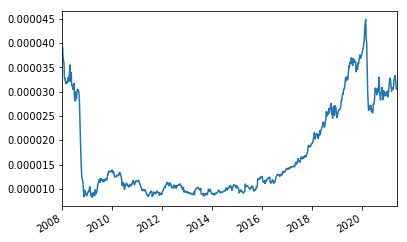

In [34]:
df2['MSFT / FED BS'].plot.line()

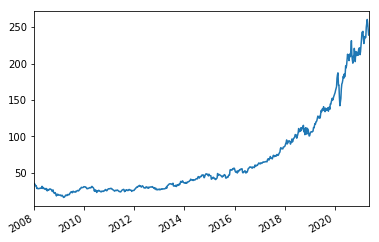

In [35]:
df2['MSFT'].plot.line()


In [36]:
#fed_yoy = fed_df.groupby
fed_df['Year'] = pd.to_datetime(fed_df.index, format = '%Y').strftime('%Y')
fed_df.head()

,FED BS,Year
DATE,,
2002-12-18,719542.0,2002
2002-12-25,732059.0,2002
2003-01-01,730994.0,2003
2003-01-08,723762.0,2003
2003-01-15,720074.0,2003


In [37]:
fed_yoy_df = fed_df.groupby('Year').mean().pct_change()
fed_yoy_df

,FED BS
Year,
2002,NaN
2003,0.018108
2004,0.048771
2005,0.050430
2006,0.038277
2007,0.032401
2008,0.376744
2009,0.734420
2010,0.112136


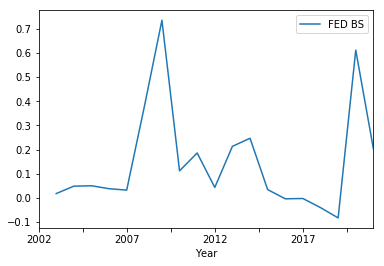

In [38]:
fed_yoy_df.plot.line()

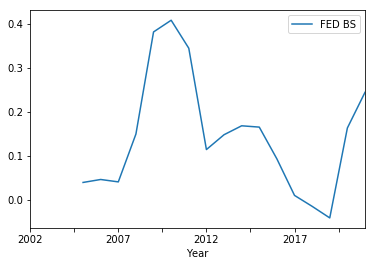

In [39]:
fed_yoy_df.rolling(window=3).mean().plot()

In [145]:
btc_csv = Path('btc.csv')
btc = pd.read_csv(btc_csv)
btc.dropna(inplace=True)
btc['Date'] = pd.to_datetime(btc['Date'], errors='coerce')
btc.set_index(btc['Date'],inplace=True)
btc.drop(columns=['Date'], inplace=True)
btc = btc.sort_index()

In [146]:
# Create btc closing price
btc_close = pd.DataFrame(btc["Price"], index=pd.to_datetime(btc.index))

In [147]:
btc_close.rename(columns = {"Price":"BTC"}, inplace=True)
btc_close= btc_close[btc_close.index.duplicated(keep='first')]
btc_close

,BTC
Date,
2010-07-19,0.1
2010-07-20,0.1
2010-07-21,0.1
2010-07-22,0.1
2010-07-23,0.1
2010-07-24,0.1
2010-07-25,0.1
2010-07-26,0.1
2010-07-27,0.1


In [148]:
btc_close['BTC'] = btc_close['BTC'].str.replace(',', '')

In [149]:
btc_close['BTC'] = btc_close['BTC'].astype('float')

In [150]:
btc_df = pd.merge(btc_close, fed_df, left_index=True, right_index=True)
btc_df.tail(20)

,BTC,FED BS,Year
2021-01-06,36793.2,7334809.0,2021
2021-01-13,37382.2,7333968.0,2021
2021-01-20,35476.3,7414942.0,2021
2021-01-27,30404.0,7404926.0,2021
2021-02-03,37646.8,7410598.0,2021
2021-02-10,44836.0,7442225.0,2021
2021-02-17,52079.2,7557402.0,2021
2021-02-24,49697.5,7590111.0,2021
2021-03-03,50395.1,7557524.0,2021
2021-03-10,55851.9,7579901.0,2021


In [151]:
btc_df.dtypes

BTC       float64
FED BS    float64
Year       object
dtype: object

In [152]:
btc_df['BTC / FED BS'] = btc_df['BTC'] / btc_df['FED BS']

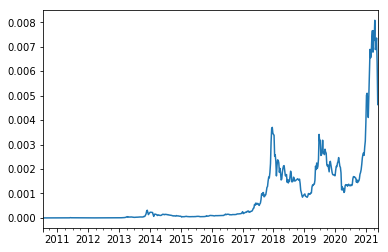

In [153]:
btc_df['BTC / FED BS'].plot.line()

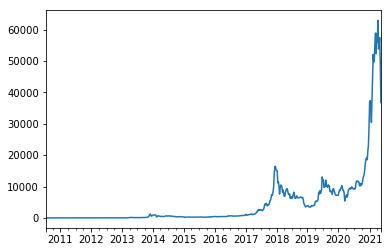

In [154]:
btc_df['BTC'].plot.line()

In [155]:
eth_csv = Path('eth.csv')
eth = pd.read_csv(
    eth_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
eth = eth.sort_index()
eth.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-06-01,"2,633.30","2,706.16","2,730.19","2,568.20",213.03K,-2.69%
2021-06-02,"2,706.19","2,633.79","2,706.19","2,633.79",85.46K,2.77%
2021-06-03,"2,856.64","2,705.24","2,856.64","2,704.66",71.74K,5.56%
2021-06-04,"2,687.05","2,857.02","2,857.02","2,638.18",109.86K,-5.94%
2021-06-05,"2,634.89","2,688.37","2,742.88","2,622.22",83.78K,-1.94%


In [156]:
# Create btc closing price
eth_close = pd.DataFrame()

eth_close["ETH"] = eth["Price"]

eth_close.index = eth_close.index.date

eth_close.tail()

,ETH
2021-06-01,"2,633.30"
2021-06-02,"2,706.19"
2021-06-03,"2,856.64"
2021-06-04,"2,687.05"
2021-06-05,"2,634.89"


In [157]:
eth_close['ETH'] = eth_close['ETH'].str.replace(',', '')
eth_close['ETH'] = eth_close['ETH'].astype('float')
eth_close.dtypes

ETH    float64
dtype: object

In [158]:
eth_df = pd.merge(eth_close, fed_df, left_index=True, right_index=True)
eth_df.tail(20)

,ETH,FED BS,Year
2021-01-06,1202.23,7334809.0,2021
2021-01-13,1010.59,7333968.0,2021
2021-01-20,1377.50,7414942.0,2021
2021-01-27,1241.35,7404926.0,2021
2021-02-03,1662.39,7410598.0,2021
2021-02-10,1740.96,7442225.0,2021
2021-02-17,1847.48,7557402.0,2021
2021-02-24,1623.51,7590111.0,2021
2021-03-03,1568.08,7557524.0,2021
2021-03-10,1794.51,7579901.0,2021


In [194]:
eth_df['ETH / FED BS'] = eth_df['ETH'] / eth_df['FED BS']

In [206]:
fed_bs_row = px.line(combo_df['FED BS'])

median_housing = px.line(combo_df['Median_Housing_Prices'])
median_housing_fed = px.line(combo_df['Median_Housing_Prices / FED BS'])

cpi = px.line(combo_df['CPI'])
cpi_fed = px.line(combo_df['CPI / FED BS'])

msft = px.line(df2['MSFT / FED BS'])
msft_fed = px.line(df2['MSFT'])

amzn = px.line(df2['AMZN'])
amzn_fed = px.line(df2['AMZN / FED BS'])

goog = px.line(df2['GOOG'])
goog_fed = px.line(df2['GOOG / FED BS'])

gdx = px.line(df2['GDX'])
gdx_fed = px.line(df2['GDX / FED BS'])

btc = px.line(btc_df['BTC'])
btc_fed = px.line(btc_df['BTC / FED BS'])

eth = px.line(eth_df["ETH"])
eth_fed = px.line(eth_df['ETH / FED BS'])

In [207]:
#Rows
fed_bs_row = pn.Row(fed_bs)
median_housing_row = pn.Row(median_housing_fed, median_housing)
cpi_row = pn.Row(cpi_fed, cpi)
msft_row = pn.Row(msft_fed,msft)
amzn_row = pn.Row(amzn_fed, amzn)
goog_row = pn.Row(goog_fed, goog)
gdx_row = pn.Row(gdx_fed, gdx)
btc_row = pn.Row(btc_fed, btc)
eth_fed_row = pn.Row(eth_fed,eth)

In [209]:
tabs = pn.Tabs(
    ("Federal Balance Sheet", fed_bs_row),
    ("Median Housing", median_housing_row),
    ("Consumer Price Index", cpi_row),
    ("Microsoft", msft_row),
    ("Amazon", amzn_row),
    ("Google", goog_row),
    ("Gold", gdx_row),
    ("BTC", btc_row),
    ("Ethereum", eth_fed_row)
    )
tabs

Tabs
    [0] Row
        [0] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['2003-01-...})
    [1] Row
        [0] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['2003-01-...})
        [1] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['2003-01-...})
    [2] Row
        [0] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['2003-01-...})
        [1] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['2003-01-...})
    [3] Row
        [0] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['2008-01-...})
        [1] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['2008-01-...})
    [4] Row
        [0] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['2008-01-...})
        [1] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['2008-01-...})
    [5] Row
        [0] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['2008-01-...})
        [1] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['2008-01-...})
    [6] Row
        [0] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['2008-01-...})
        [1] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['2008-01-...})
    [7] Row
        [0] Plotly(Figure)
        [1] Plotly(Figure)
    [8] Row
        [0] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['2018-01-...})
        [1] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['2018-01-...})